## Estadistica Aplicada
3er Parcial - 07 NOV 2023

Francisco Humberto Villegas Reyna 1731722 gpo43

**Instrucciones:** Resuelve adecuadamente en una notebook lo que se pide.
Has sido contratado como asesor del director de Metrorrey, la empresa encargada de
administrar el metro en el área metropolitana de Monterrey, NL.
El director te ha proporcionado la siguiente base de datos con la información mensual
del número de pasajeros y el ingreso generado por pasajes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import seasonal_decompose 


In [4]:
metrorrey= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

Responde lo que se pide:


1. Muestre de que tipo son las variables del dataframe, revise que no haya missing
values (de haberlos imputar valores). Cersiorarse que exista una variable fecha,
que sea el index y tenga una frecuencia asignada (1.8 puntos)

In [5]:
metrorrey.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [6]:
metrorrey.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [7]:
## formato tiempo //  el index tiempo // frecuencia el tiempo

metrorrey['mes']=pd.to_datetime(metrorrey['mes'], format='%Y/%m')

In [8]:
metrorrey=metrorrey.set_index('mes')

In [9]:
metrorrey=metrorrey.asfreq('MS')

In [10]:
metrorrey.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [11]:
metrorrey

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.000,3240.000
1995-02-01,2879.000,3623.000
1995-03-01,3103.000,3990.000
1995-04-01,3491.000,3321.000
1995-05-01,3109.000,3777.000
...,...,...
2023-04-01,9523.669,38799.657
2023-05-01,11891.646,58511.798
2023-06-01,10657.712,55684.063


2. Análisis exploratorio. Utilizando código de Python genera un print() para cada
una de la siguiente información (8 puntos):

* a. Rango de fechas
* b) Número de observaciones
* c) Valor mínimo y valor máximo del número de pasajeros



In [12]:
b= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [13]:
print('El rango de las fechas del DataFrame de la base de Metrorrey es del ',b.mes[0],'al',b.mes[343],',con',metrorrey['miles de pasajeros'].count(),'observaciones,','con el valor minimo de ',metrorrey['miles de pasajeros'].min(),'miles de pasajeros y con un valor maximo de',metrorrey['miles de pasajeros'].max(),'miles de pasajeros')

El rango de las fechas del DataFrame de la base de Metrorrey es del  1995/01 al 2023/08 ,con 344 observaciones, con el valor minimo de  2397.0 miles de pasajeros y con un valor maximo de 17534.523 miles de pasajeros


3. Grafica lo siguiente(8.2 puntos):

* a) La serie de miles de pasajeros

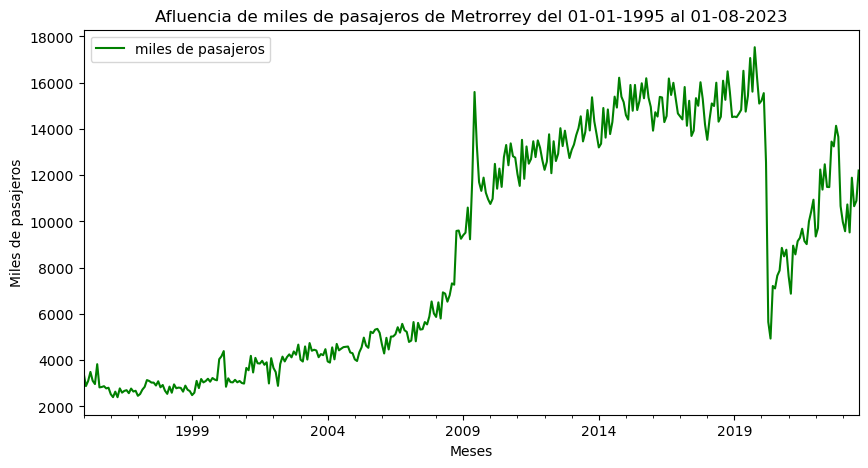

In [14]:
metrorrey['miles de pasajeros'].plot(figsize=(10,5), color='green')
plt.title('Afluencia de miles de pasajeros de Metrorrey del 01-01-1995 al 01-08-2023')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.legend();

* b)Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [15]:
metrorrey['PMC7']=metrorrey['miles de pasajeros'].rolling(7,center=True).mean()

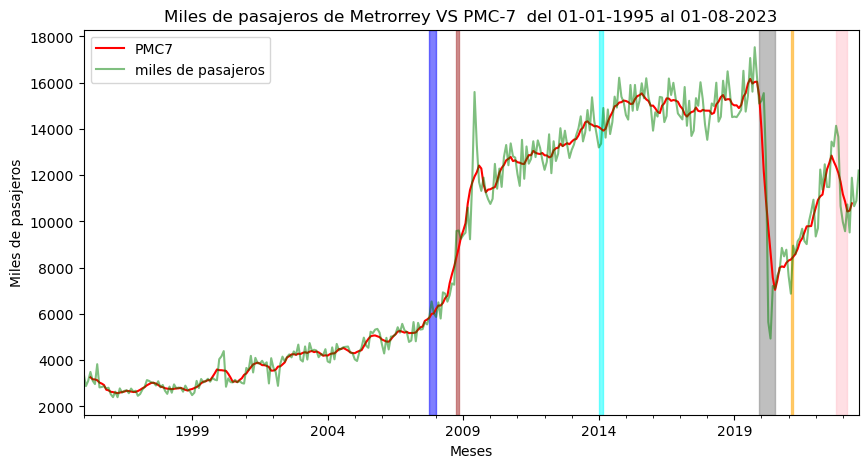

In [16]:
metrorrey['PMC7'].plot(figsize=(10,5), color='red')
metrorrey['miles de pasajeros'].plot(color='green',alpha=0.5)
plt.title('Miles de pasajeros de Metrorrey VS PMC-7  del 01-01-1995 al 01-08-2023')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.axvspan('2019-12-27','2020-07-15',color='gray', alpha=0.5)
plt.axvspan('2007-10-21','2008-01-01',color='blue', alpha=0.5)
plt.axvspan('2008-10-01','2008-11-01',color='brown', alpha=0.5)
plt.axvspan('2014-01-28','2014-03-28',color='aqua', alpha=0.5)
plt.axvspan('2021-02-27','2021-03-27',color='orange', alpha=0.5)
plt.axvspan('2022-10-05','2023-03-15',color='pink', alpha=0.5)
plt.legend();

Existen diferentes caidad y alzas en las cantidad de miles de pasajeros de Metrorrey, de las cuales fueron sombreadas de diferentes colores y seran explicadas a continuacion.

Azul : La apertura de la ampilacion de la linea 2 de Metrorrey con la Apertura de las estaciones Regina, Niños Heroes y Universidad.

Cafe: Es la terminacion de la amplicacion de la linea 2 de Metrorrey incluyendo a las Estaciones Anahuac, San Nicolas, Tapia y Sendero

Aqua: Inaguracion del Sistema Colectivo Ecovia, conectando con las diferentes estaciones de Metrorrey como Estacion Mitras o Regina.

Naranja: Inaguracion Oficial de la Linea 3 de Metrorrey iniciando labores desde la Estacion Zaragoza hasta Estación Hospital Metropolitano.

Gris desde el inicio de la pandemia del Covid-19 hasta la apertura parcial de las acitividades laborales y academica

Rosa es debido al cierre parcial de la linea 2 del metro debido a la restauracion de los pilares del metro para evitar una tragedia parecida a la ocurrida en la CDMX, suspendiendo laboras desde la estacion Regina hasta Estacion Sendero.

4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento(8.2 puntos).

In [17]:
metrorrey['ETS'] = metrorrey['miles de pasajeros'].ewm(span=12, adjust=False).mean()

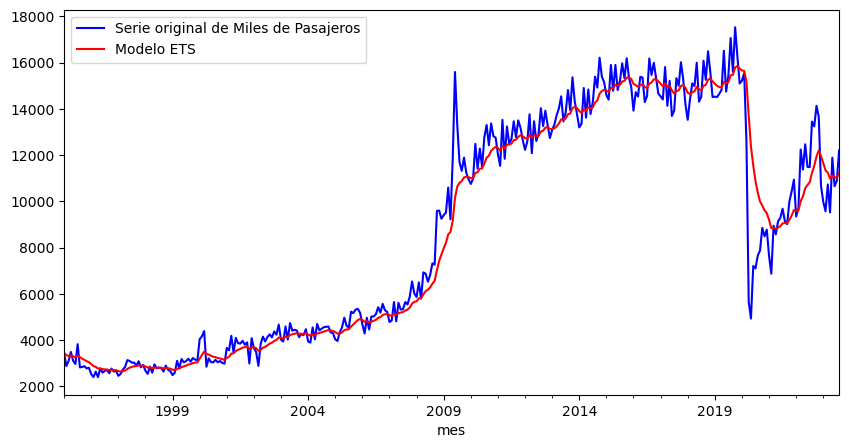

In [19]:
metrorrey['miles de pasajeros'].plot(figsize=(10,5),color='blue', label='Serie original de Miles de Pasajeros')
metrorrey['ETS'].plot(color='red',label='Modelo ETS')
plt.legend();

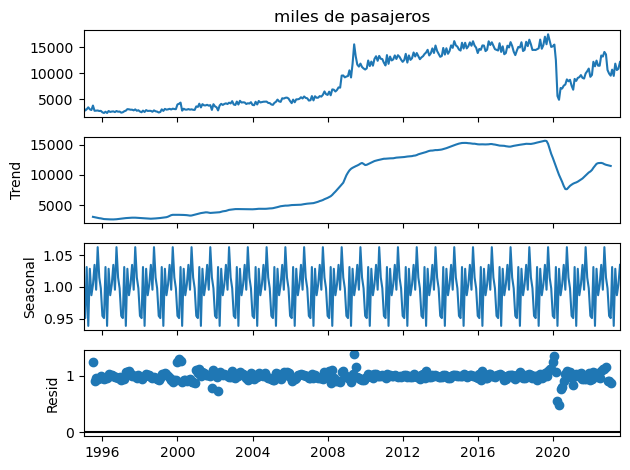

In [20]:
estacional = seasonal_decompose(metrorrey['miles de pasajeros'], model='mul')
estacional.plot();

Se recomendaria al Director de Metrorrey realizar el mantenimiento de estaciones y vagones durante los meses de noviembre a febrero debido a una baja en la afluencia de usuarios debido a temporada de vacaciones decembrina, principalmente por los estudiantes de medio superior o superior que se encuentran en vacaciones escolares tambien debido a que la gente residente de la Zona Metropolitana de Monterrey sale a visitar a familiares a otros estados y en muchos de sus trabajos descansas por temporada navideña o obtan por hacer HomeOffice.

5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos(8.2 puntos). 

In [21]:
holtwinters_model=ExponentialSmoothing(metrorrey['miles de pasajeros'], trend='mul', seasonal='mul',seasonal_periods=12).fit()


c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
pronostico_5meses=holtwinters_model.forecast(5)

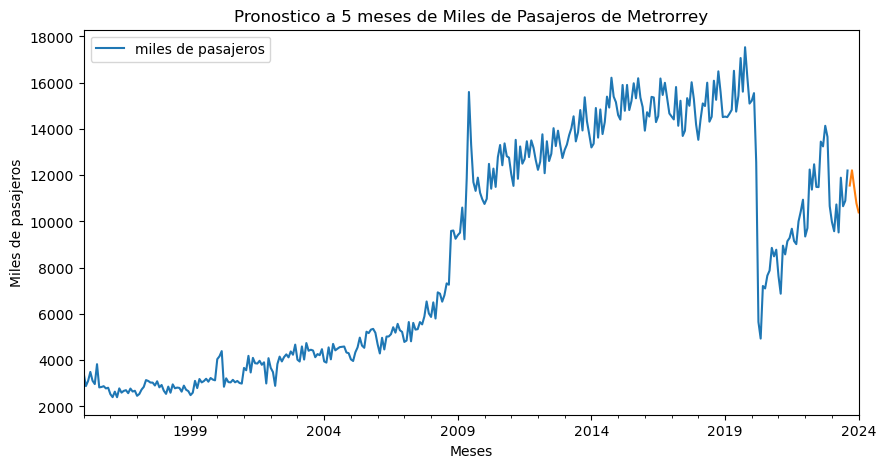

In [23]:
#grafica
metrorrey['miles de pasajeros'].plot(figsize=(10,5))
pronostico_5meses.plot()
plt.title('Pronostico a 5 meses de Miles de Pasajeros de Metrorrey')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.legend();

Pronostico de miles de pasajeros de metrorrey del 01-09-2023 al 01-01-2024 son las siguientes:

In [24]:
pronostico_5meses

2023-09-01    11552.427481
2023-10-01    12209.852476
2023-11-01    11483.302480
2023-12-01    10782.870453
2024-01-01    10391.563182
Freq: MS, dtype: float64

Pronostico de ingresos por pasajes en miles  de metrorrey del 01-09-2023 al 01-01-2024 son las siguientes:

In [27]:
(pronostico_5meses*7.1)

2023-09-01    82022.235117
2023-10-01    86689.952583
2023-11-01    81531.447611
2023-12-01    76558.380218
2024-01-01    73780.098596
Freq: MS, dtype: float64

6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA
cumpliendo los siguientes pasos:

* a) Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)


In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [29]:
## prueba de razi estacionaria
prueba_adf=adfuller(metrorrey['miles de pasajeros'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.58

* b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza 
la prueba de raíz unitaria para verificar que la serie sea estacionaria (8.2 
puntos)


In [30]:
alpha =0.05

if prueba_adf[1] < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

No rechazamos Ho, La serie es No estacionaria


In [31]:
## 1ras diferencias
metrorrey['miles de pasajeros_diff']=metrorrey['miles de pasajeros'].diff()


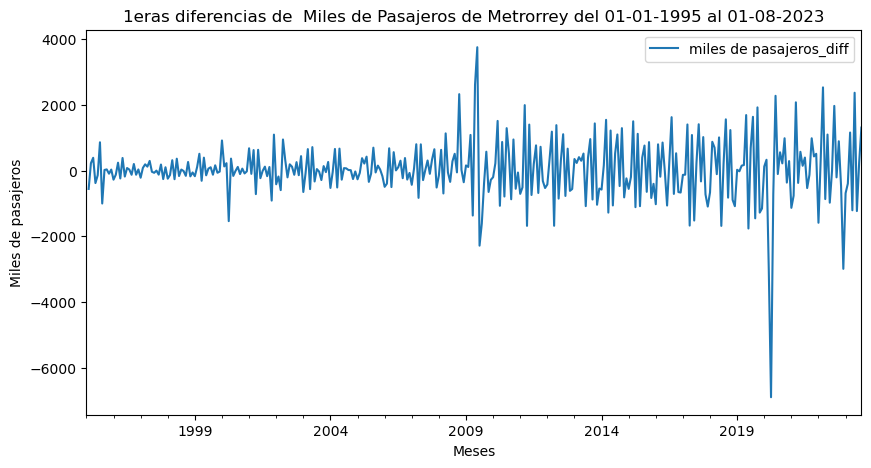

In [32]:
metrorrey['miles de pasajeros_diff'].plot(figsize=(10,5))
plt.title('1eras diferencias de  Miles de Pasajeros de Metrorrey del 01-01-1995 al 01-08-2023')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.legend();

In [33]:
## prueba de raiz unitaria a las 1ras diferencias
prueba_adf1=adfuller(metrorrey['miles de pasajeros_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

In [34]:
if pvalue1 < alpha:
    print('rechazamos Ho, La serie es estacionaria')
else:
    print('No rechazamos Ho, La serie es No estacionaria')

rechazamos Ho, La serie es estacionaria


* metrorrey integrado I(1)
* 1ras diferencias diff integrado I(0)

 * c) Si la serie no es estacionaria repite el paso b hasta que la serie sea 
estacionaria.

En este caso no se repite el paso b debido que la seria ya es estacionaria

* d) Realiza las graficas de autocorrelación de la serie estacionaria para 
verificar si la serie tiene o no un componente estacional (8.2 puntos)


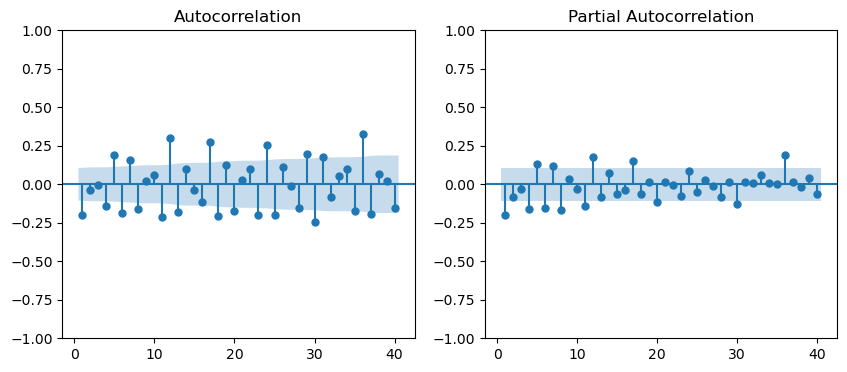

In [35]:
## graficas de autocorrelacion
ig, ax=plt.subplots(1,2,figsize=(10,4))

#1er 
plot_acf(metrorrey['miles de pasajeros_diff'].dropna(), zero=False, lags=40,ax=ax[0])

##2da
plot_pacf(metrorrey['miles de pasajeros_diff'].dropna(), zero=False, lags=40,ax=ax[1])
plt.show();

Dado el patrón repetitivo de las graficas de correlacion estamos ante una serie con componente estacional

* e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el 
parámetro information_criterion prueba y muestra el resultado, con aic, 
bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula 
termina en par, sino termina en par elegir uno distinto a aic. (8.2 puntos

In [36]:
## obtener el orden
pm.auto_arima(metrorrey['miles de pasajeros'].dropna(),

              star_p=1, start_q=1, max_p=7, max_q=7,ic='aic',seasonal=True, m=12,start_P=1,start_Q=1, max_P=7, max_Q=7
              
              
              )

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

MiLES DE PASAJEROS SARIMA(0,1,2)(1,0,1,12)

* f) Con el orden del modelo arima obtenido estima el modelo arima (8.2 
puntos)

In [37]:
model=ARIMA(metrorrey['miles de pasajeros'], order=(0,1,2), seasonal_order=(1,0,1,12))

results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2774.759
Date:                            Tue, 07 Nov 2023   AIC                           5559.518
Time:                                    23:01:34   BIC                           5578.706
Sample:                                01-01-1995   HQIC                          5567.161
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0474      0.031     -1.553      0.120      -0.107       0.012
ma.L2         -0.1823      0.037   

* g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza 
y la serie original desde 2021 (8.2 puntos)

In [38]:
inicio='2021-01-01'
fin='2024-01-01'

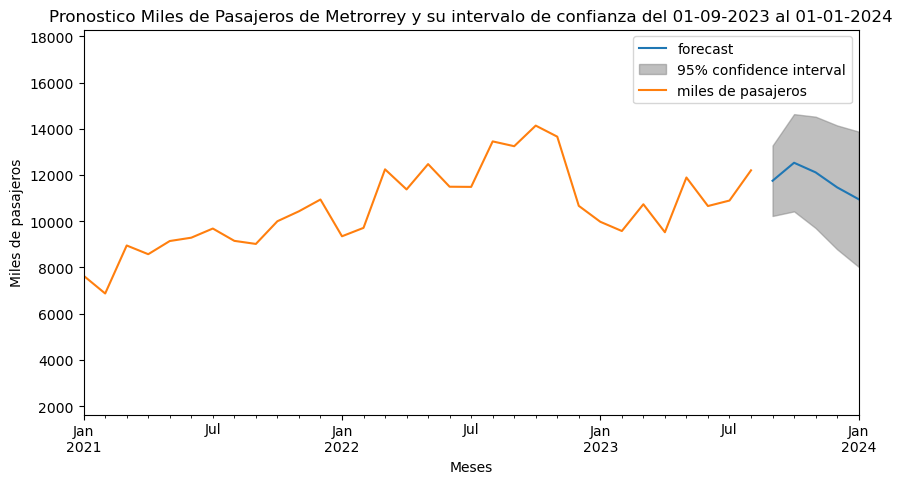

In [39]:
plot_predict(results,start='2023-09-01', end='2024-01-01')
metrorrey['miles de pasajeros'].plot(figsize=(10,5))
plt.xlim(inicio,fin)
plt.title('Pronostico Miles de Pasajeros de Metrorrey y su intervalo de confianza del 01-09-2023 al 01-01-2024')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Meses')
plt.legend();

* h) Realiza el pronostico a 5 meses con los intervalos de confianza (8.2 
puntos)

In [40]:
forecast=results.get_forecast(steps=5)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [41]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intevalos=forecast_ci.loc[inicio:fin]

EL pronostico de Miles de pasajeros de Metrorrey del 01-09-2023 al 01-01-2024 son los siguientes:

In [42]:
pronostico_valor

2023-09-01    11750.063702
2023-10-01    12529.086413
2023-11-01    12113.624399
2023-12-01    11465.163129
2024-01-01    10951.883092
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
pronostico_intevalos

,lower miles de pasajeros,upper miles de pasajeros
2023-09-01,10227.332284,13272.795120
2023-10-01,10426.060174,14632.112653
2023-11-01,9705.640952,14521.607847
2023-12-01,8786.721596,14143.604662
2024-01-01,8027.893943,13875.872240


In [44]:
df_pronosticointervalos=pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intevalos['lower miles de pasajeros'],
    'limite superior':pronostico_intevalos['upper miles de pasajeros']
})

EL pronostico de los intervalos de confianza de los Miles de pasajeros de Metrorrey del 01-09-2023 al 01-01-2024 son los siguientes:

In [45]:
df_pronosticointervalos

,pronostico,limite inferior,limite superior
2023-09-01,11750.063702,10227.332284,13272.795120
2023-10-01,12529.086413,10426.060174,14632.112653
2023-11-01,12113.624399,9705.640952,14521.607847
2023-12-01,11465.163129,8786.721596,14143.604662
2024-01-01,10951.883092,8027.893943,13875.872240


* i) Calcula los ingresos y el intervalo de los ingresos multiplicando por $7.1
(8.2 puntos)

In [46]:
df_pronostico=pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intevalos['lower miles de pasajeros']*7.1,
    'limite superior':pronostico_intevalos['upper miles de pasajeros']*7.1
})

Los ingresos y el intervalo de los ingresos de Metrorrey en Miles del 01-09-2023 al 01-01-2024 son los siguientes:

In [47]:
df_pronostico

,pronostico,limite inferior,limite superior
2023-09-01,11750.063702,72614.059214,94236.845351
2023-10-01,12529.086413,74025.027234,103887.999834
2023-11-01,12113.624399,68910.050756,103103.415714
2023-12-01,11465.163129,62385.723333,100419.593099
2024-01-01,10951.883092,56998.046997,98518.692907
